In [39]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt 
import json, urllib
import seaborn as sns 
import chart_studio.plotly as py

df = pd.read_csv('Dataset Langit Musik.csv')
df.head()

,updated_date,year,month,msisdn,first_date_transaction,last_date_transaction,recency,frequency,duration,recency_score,...,avg_album_category,jumlah_genre,avg_genre_category,los,los_cat,play_pattern,province,channel_name,product_name,payment_name
0,2020-03-30,2020,3,811101518,2019-12-07,2019-12-28,89,2,124,2,...,1. 1 album,2,1. 1 genre,1091,6.>2y,1-1-1-0-0,Jakarta Raya,LangitMusik Web WAP Client,LangitMusik Streaming,TELKOMSEL
1,2020-03-30,2020,3,811101722,2020-01-29,2020-01-29,57,2,28,3,...,1. 1 album,1,1. 1 genre,396,5.1y-2y,0-0-0-1-0,Daerah Khusus Ibukota Jakarta,Langitmusik Android,LangitMusik Premium,TELKOMSEL
2,2020-03-30,2020,3,811105399,2019-12-04,2019-12-04,113,3,284,1,...,2. 2-5 albums,1,1. 1 genre,1026,6.>2y,1-1-0-0-0,Daerah Khusus Ibukota Jakarta,LangitMusik Web WAP Client,LangitMusik Streaming,TELKOMSEL
3,2020-03-30,2020,3,811107334,2019-11-09,2019-11-09,138,12,1724,1,...,3. 5-10 albums,4,2. 2-5 genres,367,5.1y-2y,0-0-0-0-0,Daerah Khusus Ibukota Jakarta,LangitMusik Web WAP Client,LangitMusik Streaming,TELKOMSEL
4,2020-03-30,2020,3,8111107755,2019-11-29,2019-12-03,114,15,2280,1,...,2. 2-5 albums,5,2. 2-5 genres,478,5.1y-2y,1-1-0-0-0,Jawa Tengah,LangitMusik Web WAP Client,LangitMusik Streaming,TELKOMSEL


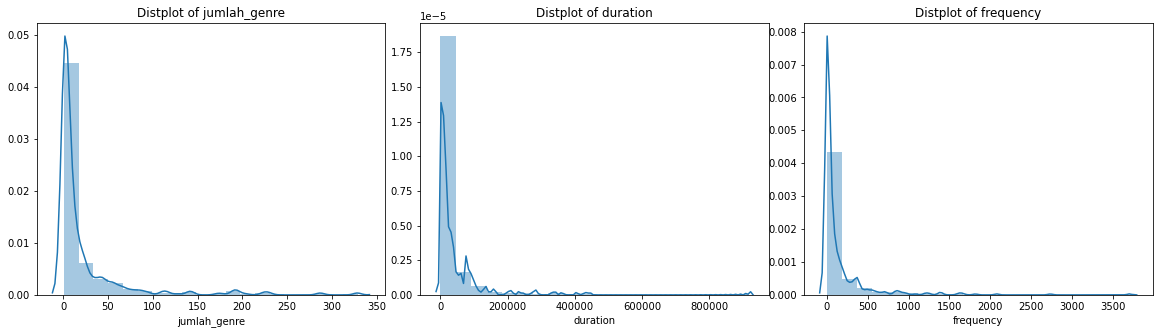

In [44]:

plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ['jumlah_genre' , 'duration' , 'frequency']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.005 , wspace = 0.10)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

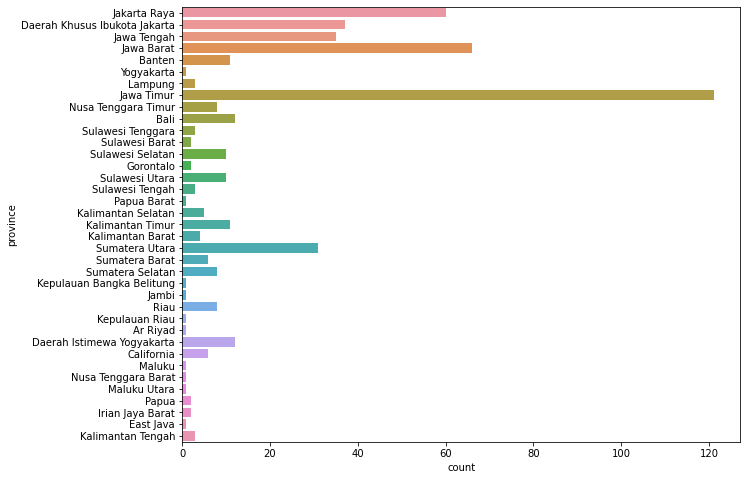

In [22]:
#Count Plot of Province
plt.figure(1 , figsize = (10 , 8))
sns.countplot(y = 'province' , data = df)
plt.show()

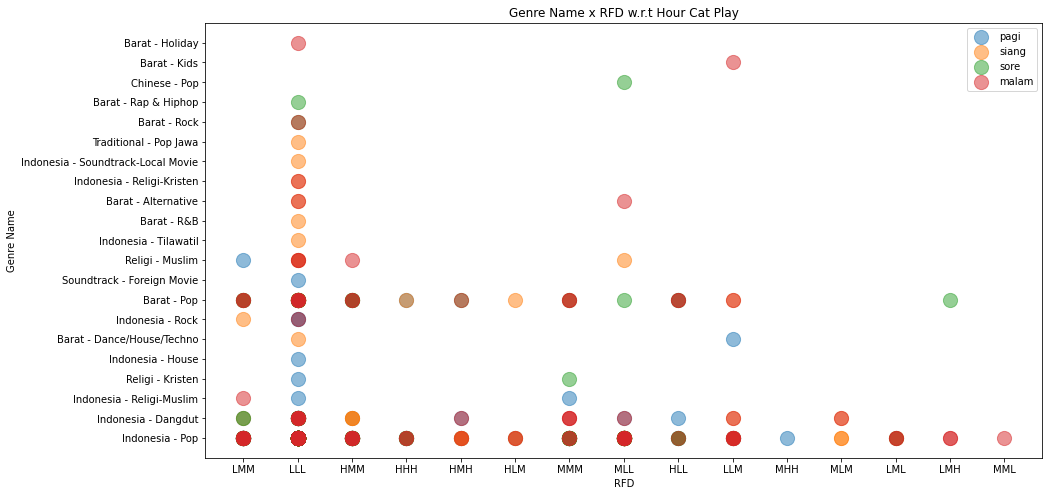

In [23]:

plt.figure(1 , figsize = (15 , 8))
for hour_cat_play in ['pagi' , 'siang', 'sore', 'malam']:
    plt.scatter(x = 'rfd',y = 'genre_name' ,
                data = df[df['hour_cat_play'] == hour_cat_play] ,s = 200 , alpha = 0.5 , label = hour_cat_play)
plt.xlabel('RFD'), plt.ylabel('Genre Name') 
plt.title('Genre Name x RFD w.r.t Hour Cat Play')
plt.legend()
plt.show()

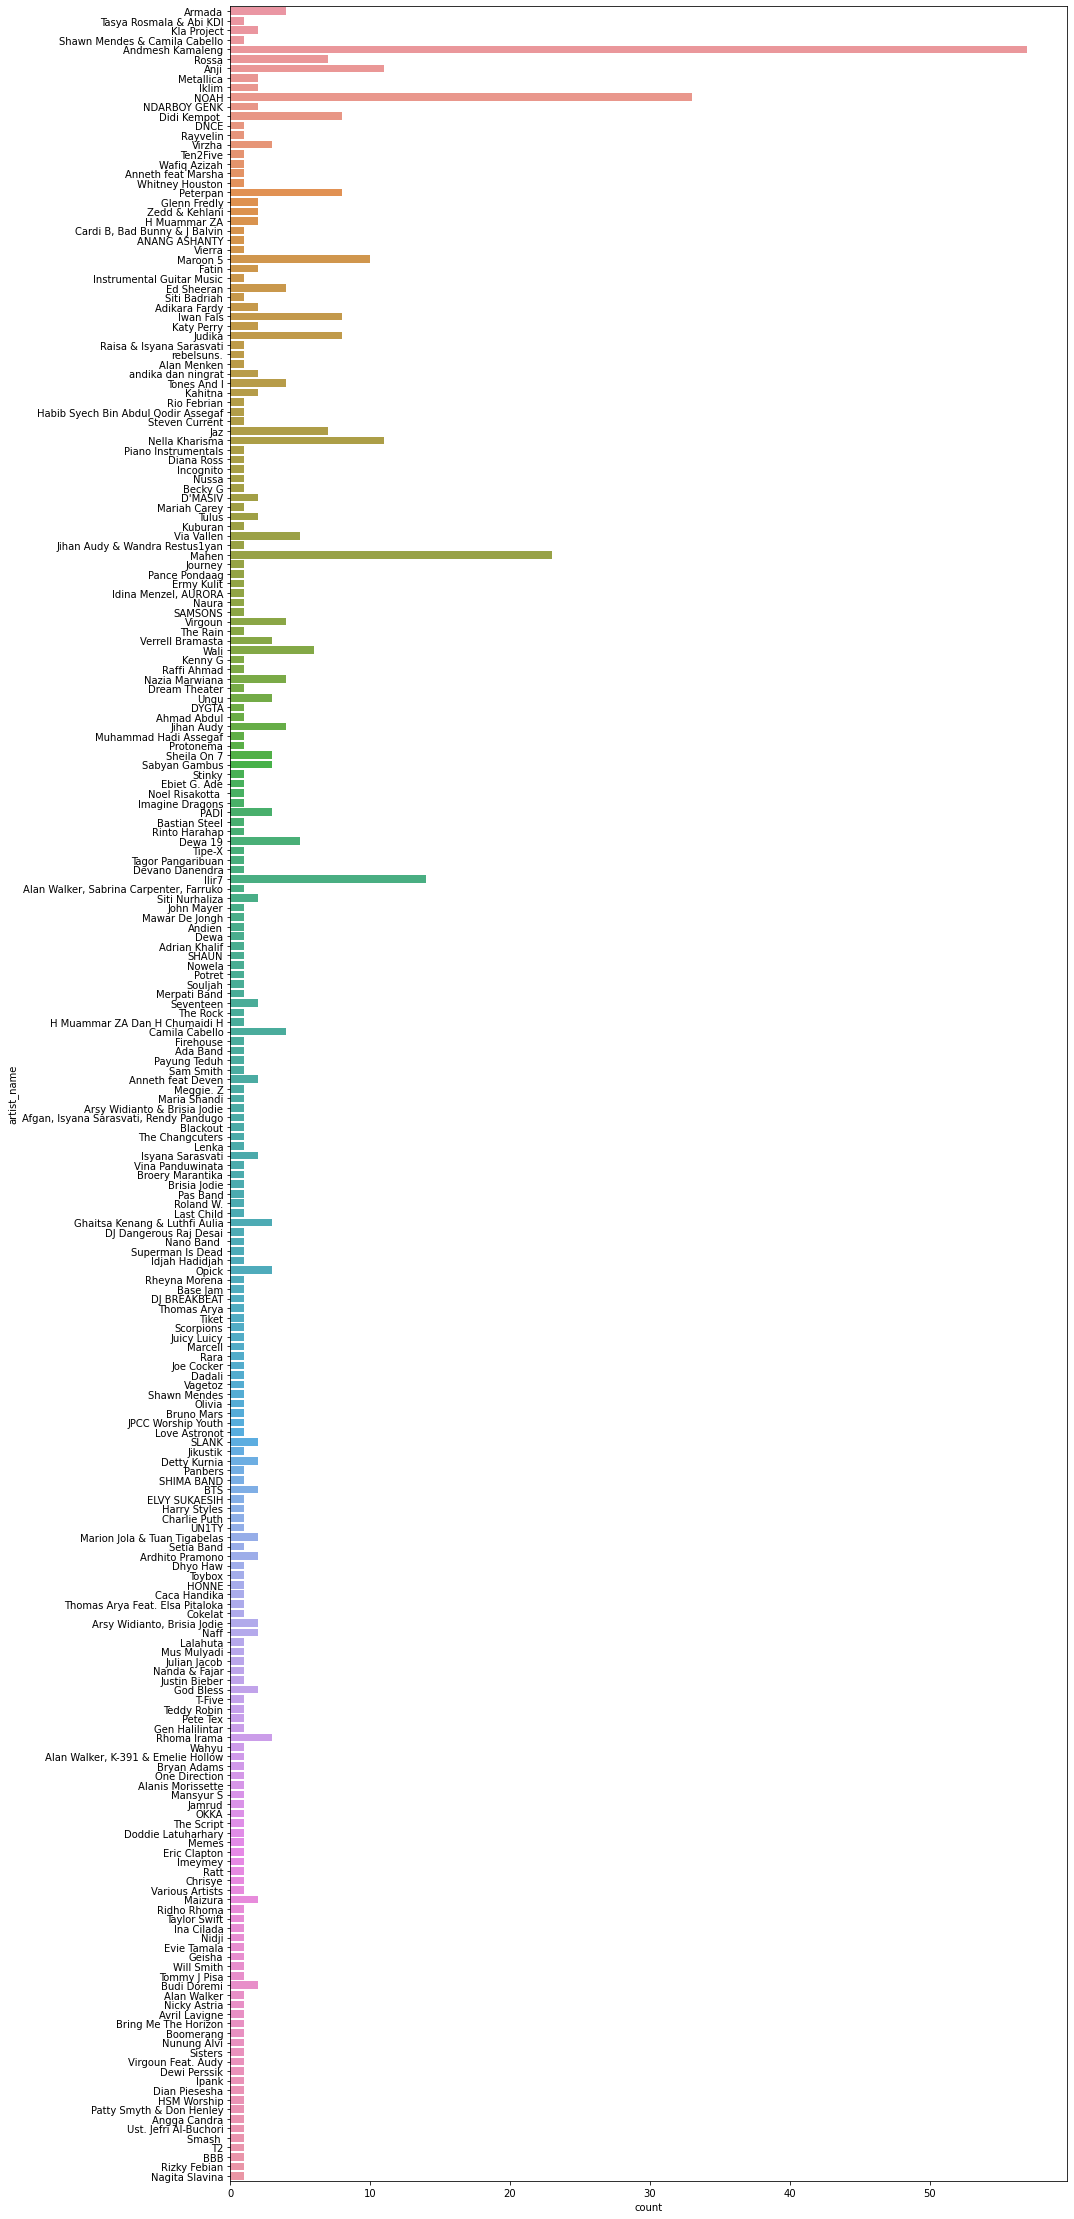

In [29]:
plt.figure(1 , figsize = (15 , 40))
sns.countplot(y = 'artist_name' , data = df)
plt.show()

In [27]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  df['genre_name, duration'].dropna(axis=0, how='any'),
      color = df['Color']
    ),
    link = dict(
      source = df['Source'].dropna(axis=0, how='any'),
      target = df['Target'].dropna(axis=0, how='any'),
      value = df['Value'].dropna(axis=0, how='any'),
      color = df['Link Color'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Scottish Referendum Voters who now want Independence",
    height = 772,
    font = dict(
      size = 10
    ),    
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

KeyError: 'genre_name, duration'